# Section 1: Loading the MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
tf.logging.set_verbosity(old_v)

C:\Users\ebish\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#some different packages that we will use
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
#you can print out the label for 1st figure
print(mnist.train.labels[0])
np.shape(mnist.train.images[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


(784,)

In [4]:
#these images are already regularized
num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

In [5]:
print(np.shape(mnist.train.images))
print(np.shape(mnist.train.labels))

(55000, 784)
(55000, 10)


# Section 2: Creating the different models

In [6]:
#created ridge, laasso, elastic_net, and linear regression models
ridge=linear_model.Ridge(alpha=.5,random_state=0)
lasso=linear_model.Lasso(alpha=.005,random_state=0)
elastic_net=linear_model.ElasticNet(alpha=.05,random_state=0)
linear_regression=linear_model.LinearRegression()

In [7]:
ridge.fit(mnist.train.images,mnist.train.labels)
lasso.fit(mnist.train.images,mnist.train.labels)
elastic_net.fit(mnist.train.images,mnist.train.labels)
linear_regression.fit(mnist.train.images,mnist.train.labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Section 2.1 Function:accuracy

In [8]:
#this function takes in predicted y with the actual labels and 
#calculates the accuracy. Since our output gives us values for every
#index value we take the max value as our prediction
#So, this function just takes the max value and turns it into a 
#format to compare with our one hot encoded labels
def accuracy(y_predict, y_data):
    y_predict_arg=y_predict.argmax(axis=1)
    y_predict_arg=np.array(y_predict_arg)
    y_predict_arg=y_predict_arg.reshape(-1,1)
    enc=OneHotEncoder()
    mod_hot=enc.fit(y_predict_arg)
    hot_encoded_predicted_y=enc.transform(y_predict_arg).toarray()
    acc=accuracy_score(y_data, hot_encoded_predicted_y)
    return acc

In [9]:
y_predict_r=ridge.predict(mnist.validation.images)
y_predict_l=lasso.predict(mnist.validation.images)
y_predict_en=elastic_net.predict(mnist.validation.images)
y_predict_lr=linear_regression.predict(mnist.validation.images)
ridge_acc_val=accuracy(y_predict_r, mnist.validation.labels)
lasso_acc_val=accuracy(y_predict_l, mnist.validation.labels)
elasnet_acc_val=accuracy(y_predict_en, mnist.validation.labels)
linreg_acc_val=accuracy(y_predict_lr, mnist.validation.labels)



In [112]:
#accuracy on validation set
print("Method            Accuracy on Validation Set")
print("Ridge             ",ridge_acc_val)
print("Lasso             ", lasso_acc_val)
print("Elastic Net       ", elasnet_acc_val)
print("Linear Regression ", linreg_acc_val)

Method            Accuracy on Validation Set
Ridge              0.857
Lasso              0.8178
Elastic Net        0.8364
Linear Regression  0.8568


# Section 2.2 Plotting visual represtations

Plotted the visual representation of the mapping for the different models. To do this took the coefficient values and reshaped each column into the orignal 28 by 28 figure. Did Red Blue coloring where Red are the positive values and dark blue are the negative values.

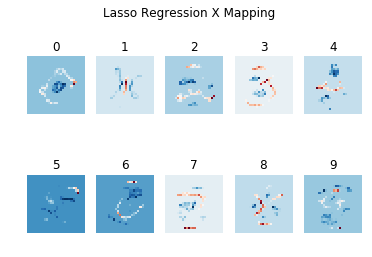

In [153]:
lasso_c=np.transpose(lasso.coef_)
for i in np.arange(10):
    lcr=np.reshape(lasso_c[:,i],[28,28])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr,cmap='RdBu_r')
    plt.axis('off')
plt.suptitle("Lasso Regression X Mapping")
plt.savefig('lasso.png')

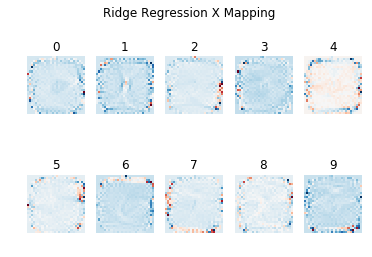

In [154]:
ridge_c=np.transpose(ridge.coef_)
for i in np.arange(10):
    lcr=np.reshape(ridge_c[:,i],[28,28])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr, cmap='RdBu_r')
    plt.axis('off')
    plt.suptitle("Ridge Regression X Mapping")
    
plt.savefig('Ridge.png')

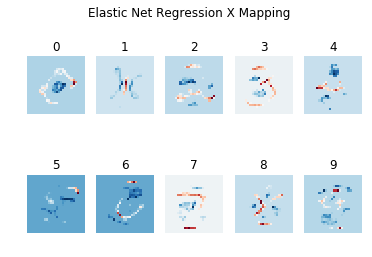

In [168]:
elastic_net_c=np.transpose(elastic_net.coef_)
for i in np.arange(10):
    lcr=np.reshape(elastic_net_c[:,i],[28,28])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr, cmap='RdBu_r')
    plt.axis('off')
plt.suptitle("Elastic Net Regression X Mapping")
plt.savefig('elasticnet.png')


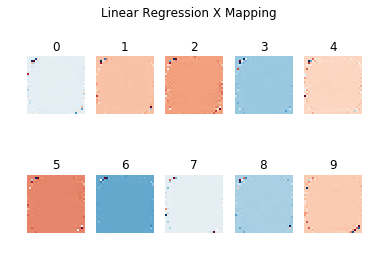

In [167]:
linear_regression_c=np.transpose(linear_regression.coef_)
for i in np.arange(10):
    lcr=np.reshape(linear_regression_c[:,i],[28,28])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr, cmap='RdBu_r')
    plt.axis('off')
plt.suptitle("Linear Regression X Mapping")
plt.savefig('linear.png')

# Section 3 Different functions

In [198]:
#function that plots the absolute summed coefficient values. 
def plot_coef(model,x_axis):
    coef=np.transpose(model.coef_)
    rc=np.sum(abs(coef), axis=1)
    rc_x=np.arange(x_axis)
    plt.bar(rc_x,rc)

In [12]:
#function that takes the top coefficient values and gives me 
#only the rows I want from the model and makes every other row
#zeros
def max_coef_x(model,top):
    coef=np.transpose(model.coef_)
    rc=np.sum(abs(coef), axis=1)
    max_list=np.argsort(rc)[-top:]
    k=np.zeros((784,10))
    for i in max_list:
        k[i]=coef[i]
    return k

# Section 4 Deeper look into Lasso Regression

In [94]:
#for each alpha between .005 and .001 find the accucary on the training and
#on the validation dataset.
alphas=np.arange(.005,.01,.001)
acc_val=[]
acc_train=[]
for i in range(len(alphas)):
    lasso_a=linear_model.Lasso(alpha=alphas[i],random_state=0)
    lasso_a.fit(mnist.train.images,mnist.train.labels)
    y_pre_train_lasso=lasso_a.predict(mnist.train.images)
    y_pre_val_lasso=lasso_a.predict(mnist.validation.images)
    acc_train.append(accuracy(y_pre_train_lasso,mnist.train.labels))
    acc_val.append(accuracy(y_pre_val_lasso,mnist.validation.labels))
    


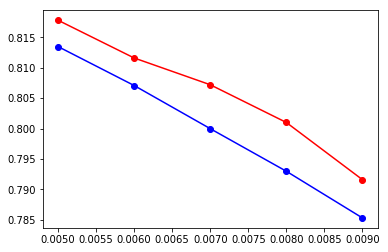

In [95]:
#plot for the accuracy on training and validation data from above
plt.plot(alphas,acc_val,'-o',c='red')
plt.plot(alphas,acc_train,'-o',c='blue')

In [250]:
coef=np.transpose(lasso.coef_)
rc=np.sum(abs(coef), axis=1)
count=0
for i in np.arange(784):
    if rc[i]==0.0:
        count+=1
        
count

492

In [252]:
784-count

292

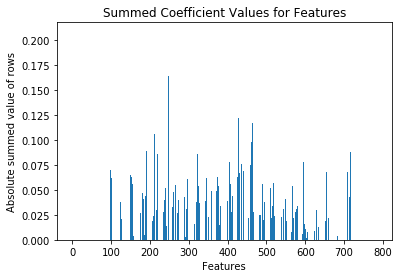

In [199]:
#using the function defined above to see the different 
#summed coefficients
plot_coef(lasso,784)
plt.ylabel("Absolute summed value of rows")
plt.xlabel("Features")
plt.title("Summed Coefficient Values for Features")
plt.savefig("coeffsum_lasso.png")


# Section 4.2 Pixel Information

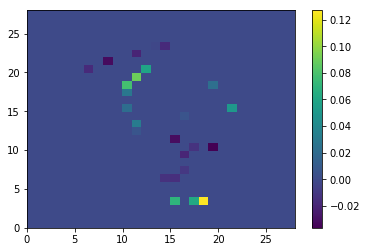

In [173]:
#looking at the most informative pixels for the top 100
#pixels for the digit 6
X_truncated=max_coef_x(lasso,100)
tr=np.reshape(X_truncated[:,6],[28,28])
plt.pcolor(tr)
plt.colorbar()

In [16]:
#finding the top 100 coefficients and then plotting the new 
#mappings for the space on the original mapping
k1=max_coef_x(lasso,100)
new_prediction=np.dot(mnist.validation.images, k1)
accuracy(new_prediction,mnist.validation.labels)

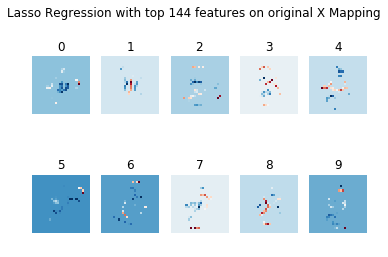

In [212]:
for i in np.arange(10):
    lcr=np.reshape(k1[:,i],[28,28])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr, cmap='RdBu_r')
    plt.axis('off')
   # plt.colorbar(lcr)
plt.suptitle("Lasso Regression with top 144 features on original X Mapping")
plt.savefig('la_144_full.png')

In [182]:
#find the accuracy for the validation dataset on the values 10-78
#by a factor of 10
vals=np.arange(10,780,10)
acc_new=[]

for t in vals:
    coef=np.transpose(lasso.coef_)
    rc=np.sum(abs(coef), axis=1)
    max_list=np.argsort(rc)[-t:]
    newdata=[]
    newlabels=[]
    valdata=[]
    vallabels=[]
    for i in max_list:
        newdata.append(mnist.train.images[:,i])
        valdata.append(mnist.validation.images[:,i])
    newdata=np.transpose(newdata)
    valdata=(np.transpose(valdata))
    lasso2=linear_model.Lasso(alpha=.005,random_state=0)
    lasso2.fit(newdata,mnist.train.labels)
    y_predict_lasso_shrunk=lasso2.predict(valdata)
    acc_new.append(accuracy(y_predict_lasso_shrunk,mnist.validation.labels))



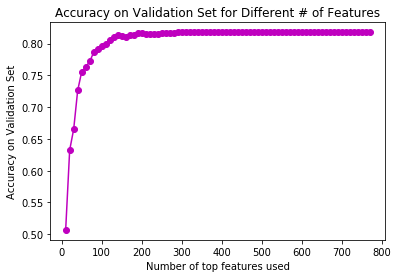

In [195]:
#plot the accuracy found above
plt.plot(vals, acc_new, '-o',c='m')
plt.xlabel("Number of top features used")
plt.ylabel("Accuracy on Validation Set")
plt.title("Accuracy on Validation Set for Different # of Features")
plt.savefig('Accuracy_Features.png')

In [23]:
#just double checking that the dimensions are in the correct order
newdata=np.transpose(newdata)
print(np.shape(newdata))
print(np.shape(mnist.train.labels))
valdata=(np.transpose(valdata))
print(np.shape(valdata))
print(np.shape(mnist.validation.labels))


(55000, 100)
(55000, 10)
(5000, 100)
(5000, 10)


In [245]:
#compute the accuracy score for lasso with the top 144 features
coef=np.transpose(lasso.coef_)
rc=np.sum(abs(coef), axis=1)
max_list=np.argsort(rc)[-144:]
newdata=[]
valdata=[]
testdata=[]
for i in max_list:
    newdata.append(mnist.train.images[:,i])
    valdata.append(mnist.validation.images[:,i])
    testdata.append(mnist.test.images[:,i])
newdata=np.transpose(newdata)
valdata=(np.transpose(valdata))
testdata=np.transpose(testdata)
lasso2=linear_model.Lasso(alpha=.005,random_state=0)
lasso2.fit(newdata,mnist.train.labels)
y_predict_lasso_shrunk=lasso2.predict(valdata)
acc_144_lasso=(accuracy(y_predict_lasso_shrunk,mnist.validation.labels))



In [207]:
#the accuracy is...
acc_144_lasso

0.8114

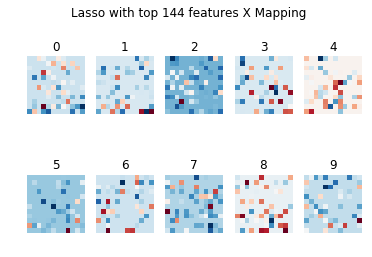

In [206]:
#plot the different mappings for each number but in the new 
#mapping space of 12 by 12
lass_144=np.transpose(lasso2.coef_)
for i in np.arange(10):
    lcr=np.reshape(lass_144[:,i],[12,12])
    x=plt.subplot(2,5,i+1)
    x.title.set_text(i)
    plt.imshow(lcr, cmap='RdBu_r')
    plt.axis('off')
   # plt.colorbar(lcr)
plt.suptitle("Lasso with top 144 features X Mapping")
plt.savefig('lasso_144.png')

# Section 5 Digits Individually

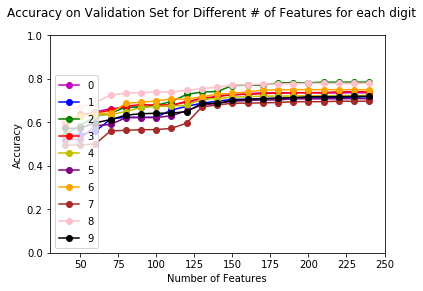

In [241]:
#here we plot the results for the 10 different digits individually
colors=['m','b','g','r','y','purple','orange','brown','pink','black'] #the 10 colors to use
for j in np.arange(0,10):
    vals=np.arange(40,250,10)
    acc_new=[] #where to hold the accuracy values

    for t in vals:
        coef=np.transpose(lasso.coef_)
        rc=coef[:,j] #take each column which represents each digit
        max_list=np.argsort(rc)[-t:]
        newdata=[]
        newlabels=[]
        valdata=[]
        vallabels=[]
        for i in max_list:
            newdata.append(mnist.train.images[:,i])
            valdata.append(mnist.validation.images[:,i])
       
        newdata=np.transpose(newdata)
        valdata=(np.transpose(valdata))
        lasso2=linear_model.Lasso(alpha=.005,random_state=0)
        lasso2.fit(newdata,mnist.train.labels)
        y_predict_lasso_shrunk=lasso2.predict(valdata)
        acc_new.append(accuracy(y_predict_lasso_shrunk,mnist.validation.labels))

#     plot all of hte digit accuracies together
    pl_total=plt.plot(vals, acc_new, '-o',c=colors[j],label='${j}$'.format(j=j))
    plt.ylim([0.4,1])
    plt.legend(loc='lower left')
    plt.suptitle("Accuracy on Validation Set for Different # of Features for each digit")
    plt.savefig('impact_on_accuracy.png')
    plt.xlabel("Number of Features")
    plt.ylabel('Accuracy')


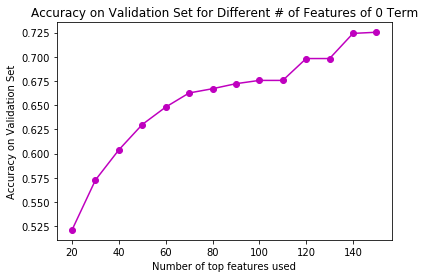

In [225]:
#this is doing the same thing as above, but just looking at one 
#single digit instead of all 10 on the graph
plt.plot(vals, acc_new, '-o',c='m')
plt.xlabel("Number of top features used")
plt.ylabel("Accuracy on Validation Set")
plt.title("Accuracy on Validation Set for Different # of Features of 0 Term")
plt.savefig('Accuracy_Features_0.png')

# Section 6 Finally finding the test accuracy with our final model

In [248]:
y_predict_lasso_test=lasso2.predict(testdata)
acc_144_lasso_test=(accuracy(y_predict_lasso_test,mnist.test.labels))

In [249]:
print("The test accuracy for our final model is",acc_144_lasso_test)

The test accuracy for our final model is 0.8172
